## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

# Wine 

In [3]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
#check wine data
wine_df = pd.DataFrame(np.concatenate((wine.data, wine.target.reshape(-1, 1)), axis=1), columns=wine.feature_names+list(['target']))
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [5]:
#check feature data type
print(wine_df.dtypes)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object


In [6]:
#check NA
print(wine_df.isna().any())
print(wine_df.isnull().any())

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
target                          False
dtype: bool
alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False


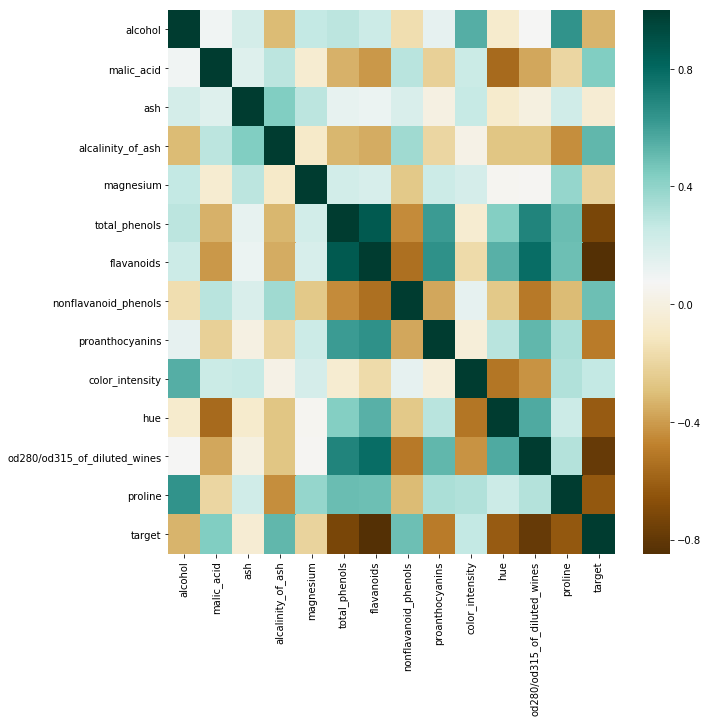

In [7]:
#chcek correlation
plt.figure(figsize=(10, 10))
sns.heatmap(wine_df.corr(), cmap=plt.cm.BrBG);

In [8]:
wine_df.corr().loc[np.abs(wine_df.corr().target) > 0.5, ['target']].sort_values(by='target')

,target
flavanoids,-0.847498
od280/od315_of_diluted_wines,-0.788230
total_phenols,-0.719163
proline,-0.633717
hue,-0.617369
alcalinity_of_ash,0.517859
target,1.000000


In [9]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [10]:
# train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(wine_df[wine.feature_names],
                                                    wine_df['target'], random_state=0)


In [11]:
#Feature Scale
mm_scale = MinMaxScaler()
mm_scale.fit(X_train)
X_train = mm_scale.transform(X_train)
X_test = mm_scale.transform(X_test)

In [12]:
#fit base model as origin reference
wine_Logistic_Regressor = linear_model.LogisticRegression()
wine_score = cross_val_score(wine_Logistic_Regressor, X_train, Y_train, cv=5)
wine_score, wine_score.mean()

(array([0.92592593, 1.        , 0.96296296, 1.        , 0.92307692]),
 0.9623931623931623)

In [13]:
#check test set
wine_Logistic_Regressor.fit(X_train, Y_train)
wine_test = wine_Logistic_Regressor.predict(X_test)
wine_test_acc = np.mean(wine_test == Y_test)
wine_test_acc

0.9777777777777777

In [14]:
wine_train = wine_Logistic_Regressor.predict(X_train)

In [15]:
#index for classification
def class_index_cal(y_true, y_test):
    table = pd.DataFrame(index=['tp', 'fp', 'fn', 'tn', 'recall', 'precision', 'accuracy'])
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_true, y_test))
    for i in range(0, len(np.unique(y_true))):    
        tp = confusion_matrix.iloc[i, i]
        fp = confusion_matrix.sum(axis=1).values[i] - confusion_matrix.iloc[i, i]
        fn = confusion_matrix.sum(axis=0).values[i] - confusion_matrix.iloc[i, i]
        tn = np.sum(confusion_matrix.sum(axis=1).values) - tp - fp - fn
        #print('tp/fp/fn/tn:{}/{}/{}/{}'.format(tp, fp, fn, tn))
        table['class'+str(i)] = [tp, fp, fn, tn, tp/(tp+fn), fp/(tp+fp), (tp+tn)/(tp+fp+fn+tn)]
    return table
    

In [16]:
train_confusion_matirx = pd.DataFrame(metrics.confusion_matrix(Y_train, wine_train),
                                     columns=wine.target_names, index=wine.target_names)
train_confusion_matirx

,class_0,class_1,class_2
class_0,42,1,0
class_1,0,48,2
class_2,0,0,40


In [17]:
class_index_cal(Y_train, wine_train)

,class0,class1,class2
tp,42.000000,48.000000,40.000000
fp,1.000000,2.000000,0.000000
fn,0.000000,1.000000,2.000000
tn,90.000000,82.000000,91.000000
recall,1.000000,0.979592,0.952381
precision,0.023256,0.040000,0.000000
accuracy,0.992481,0.977444,0.984962


In [18]:
test_confusion_matrix = pd.DataFrame(metrics.confusion_matrix(Y_test, wine_test),
                                     columns=wine.target_names, index=wine.target_names)
test_confusion_matrix

,class_0,class_1,class_2
class_0,16,0,0
class_1,0,20,1
class_2,0,0,8


In [19]:
class_index_cal(Y_test, wine_test)

,class0,class1,class2
tp,16.0,20.000000,8.000000
fp,0.0,1.000000,0.000000
fn,0.0,0.000000,1.000000
tn,29.0,24.000000,36.000000
recall,1.0,1.000000,0.888889
precision,0.0,0.047619,0.000000
accuracy,1.0,0.977778,0.977778


# Boston House Pricing

In [20]:
#boston price
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_target = pd.DataFrame(boston.target , columns=['TARGET'])
boston_df = pd.concat([boston_df, boston_target], axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
#check data type
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TARGET     float64
dtype: object

In [23]:
#na null check
print('check_NA:\n', boston_df.isna().any())
print('\ncheck_NULL:\n', boston_df.isnull().any())

check_NA:
 CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TARGET     False
dtype: bool

check_NULL:
 CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TARGET     False
dtype: bool


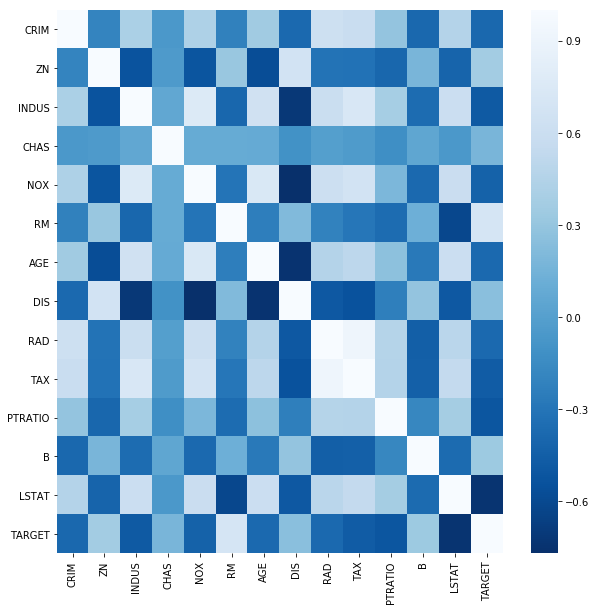

In [24]:
#correlation
plt.figure(figsize=(10, 10))
sns.heatmap(boston_df.corr(), cmap =plt.cm.Blues_r)

In [25]:
boston_df.corr()[np.abs(boston_df.corr()['TARGET']) > 0.5]['TARGET'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
RM         0.695360
TARGET     1.000000
Name: TARGET, dtype: float64

In [26]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(boston_df[boston.feature_names], boston_df['TARGET'])

# Check Target distirbusion


In [63]:
boston_target_log1p = np.log1p(boston.target)

Text(0.5, 1.0, 'Log(Target + 1)')

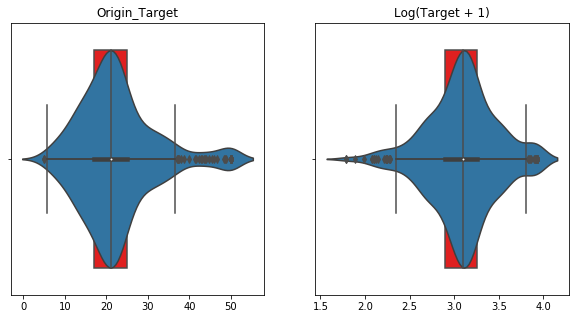

In [72]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.boxplot(boston.target, color='r')
sns.violinplot(boston.target)
plt.title('Origin_Target')
plt.subplot(122)
sns.boxplot(boston_target_log1p, color='r')
sns.violinplot(boston_target_log1p)
plt.title('Log(Target + 1)')

# feature scaling >> Z-score

In [27]:
#feature Z-score scale
ss_scaler = StandardScaler()
ss_scaler.fit(x_train)
x_train_ss = ss_scaler.transform(x_train)
x_test_ss = ss_scaler.transform(x_test)

In [36]:
#feature MinMax scale
mm_scaler = MinMaxScaler()
mm_scaler.fit(x_train)
x_train_mm = mm_scaler.transform(x_train)
x_test_mm = mm_scaler.transform(x_test)

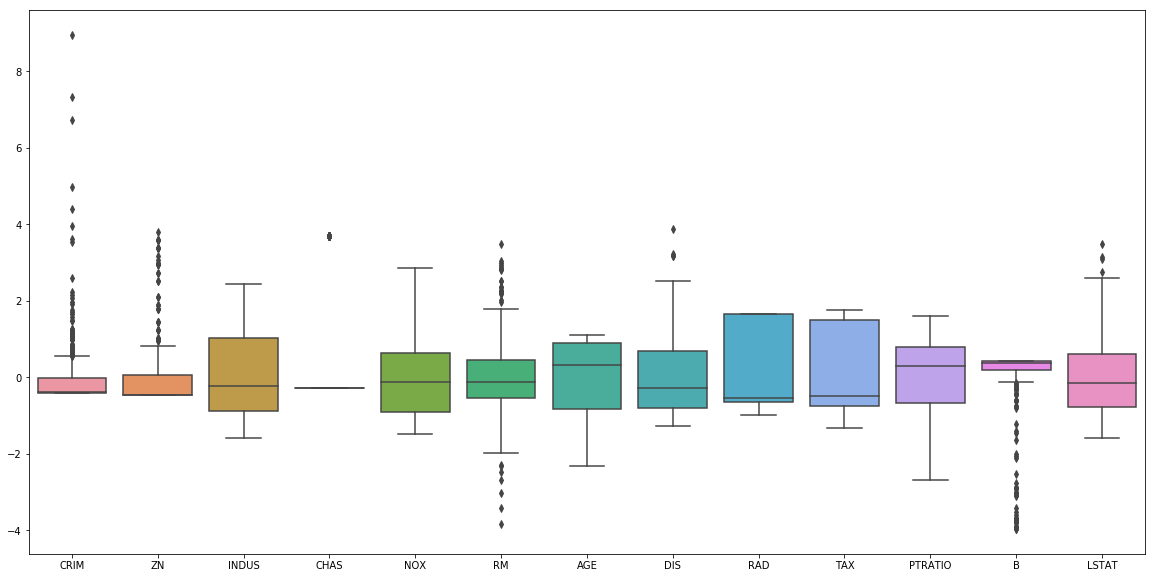

In [28]:
#uni-variaable outlier check Z-score
x_train_ss_df = pd.DataFrame(x_train_ss, columns=boston.feature_names)
plt.figure(figsize=(20, 10))
sns.boxplot(data=x_train_ss_df)
plt.show()

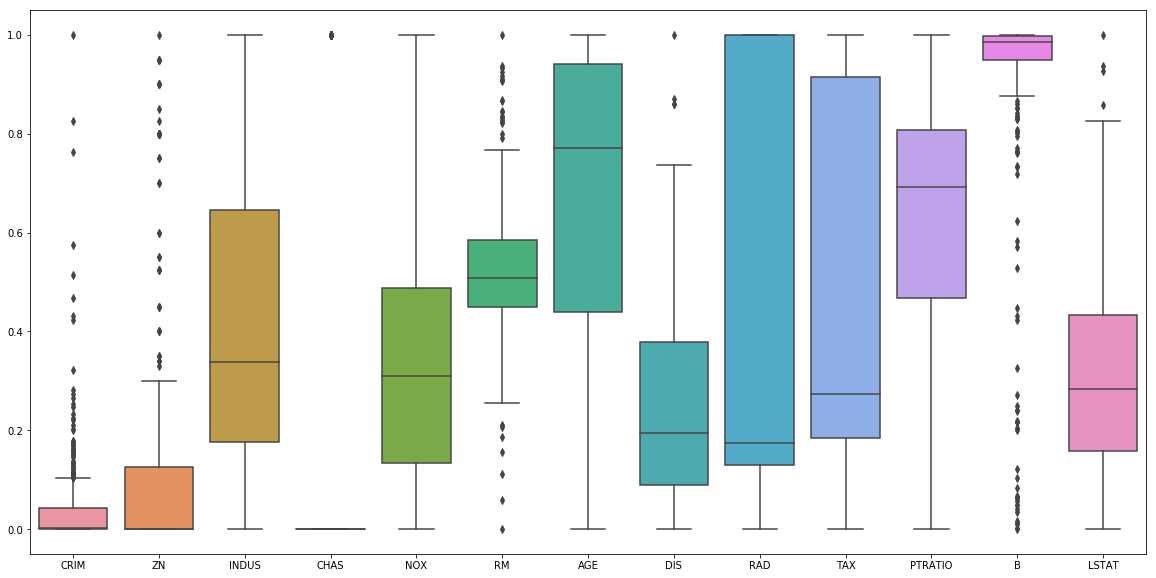

In [37]:
#uni-variaable outlier check MinMax
x_train_mm_df = pd.DataFrame(x_train_mm, columns=boston.feature_names)
plt.figure(figsize=(20, 10))
sns.boxplot(data=x_train_mm_df)
plt.show()

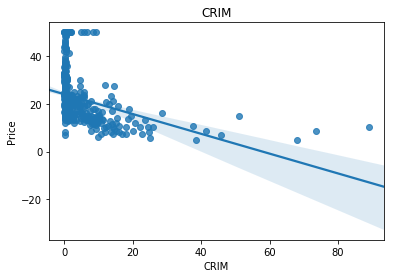

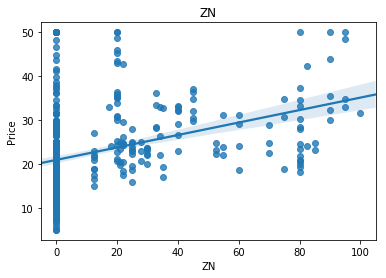

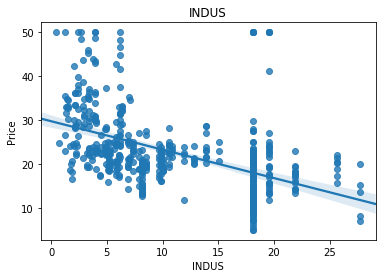

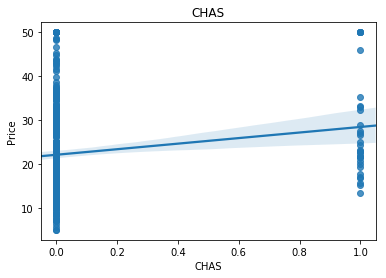

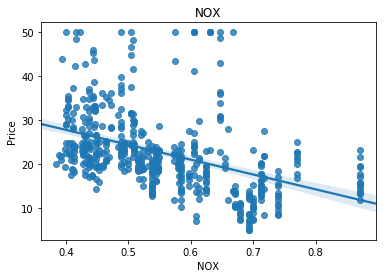

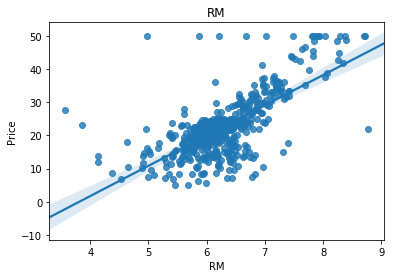

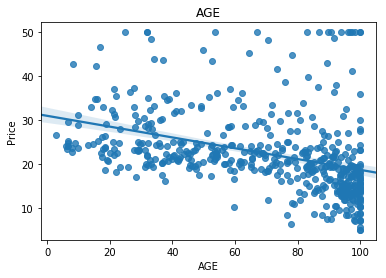

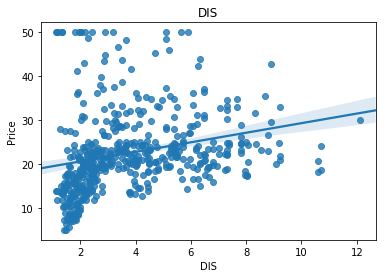

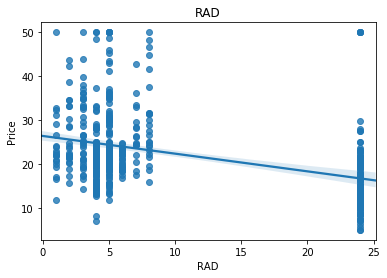

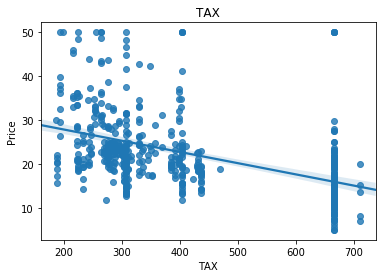

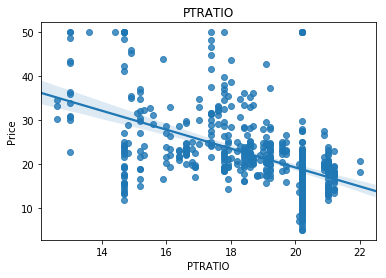

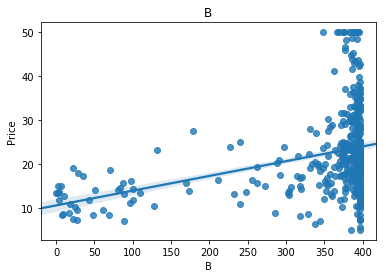

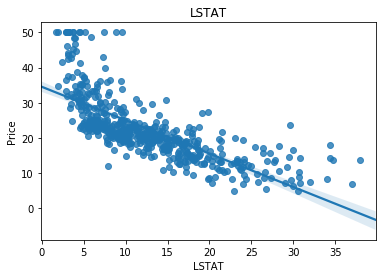

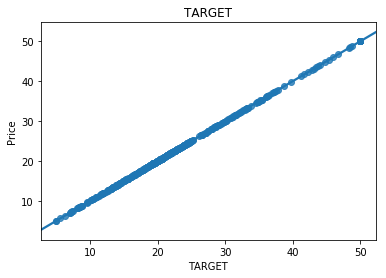

In [29]:
# multi-variable outlier with target
for col in boston_df.columns:
    plt.figure()
    sns.regplot(boston_df[col], boston_df['TARGET'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

# Lasso Result

In [75]:
# Z-score 
B_Lasso_estimator = linear_model.Lasso()
B_Lasso_estimator.fit(x_train_ss, y_train)
Z_score_coef = B_Lasso_estimator.coef_

In [76]:
for col, coef in zip(boston.feature_names, Z_score_coef):
    print('{}:{}'.format(col, coef))

CRIM:-0.0
ZN:0.0
INDUS:-0.0
CHAS:0.005304213772580268
NOX:-0.0
RM:2.715413086884647
AGE:-0.0
DIS:-0.0
RAD:-0.0
TAX:-0.0
PTRATIO:-1.4153981423699902
B:0.0
LSTAT:-3.637844497880514


In [77]:
result_ss = cross_val_score(B_Lasso_estimator, x_train_ss, y_train, cv=5)
result_ss.mean(), result_ss

(0.6447276833186611,
 array([0.63440498, 0.74563601, 0.61678705, 0.64656129, 0.58024908]))

In [82]:
# MinMax
B_Lasso_estimator.fit(x_train_mm, y_train)
MinMax_coef = B_Lasso_estimator.coef_

In [83]:
for col, coef in zip(boston.feature_names, MinMax_coef):
    print('{}:{}'.format(col, coef))

CRIM:-0.0
ZN:0.0
INDUS:-0.0
CHAS:0.0
NOX:-0.0
RM:0.0
AGE:-0.0
DIS:0.0
RAD:-0.0
TAX:-1.0902943733543369
PTRATIO:-0.0
B:0.0
LSTAT:-7.883084903578154


In [84]:
result_mm = cross_val_score(B_Lasso_estimator, x_train_mm, y_train, cv=5)
result_mm.mean(), result_mm

(0.22883327701932163,
 array([0.2585171 , 0.29641858, 0.27856829, 0.2068845 , 0.10377792]))

In [85]:
# MinMax + Z-score
ss_scaler.fit(x_train_mm)
x_train_mm_ss = ss_scaler.transform(x_train_mm)
B_Lasso_estimator.fit(x_train_mm_ss, y_train)
MinMax_Z_score_coef = B_Lasso_estimator.coef_

In [86]:
for col, coef in zip(boston.feature_names, MinMax_Z_score_coef):
    print('{}:{}'.format(col, coef))

CRIM:-0.0
ZN:0.0
INDUS:-0.0
CHAS:0.005304213772580268
NOX:-0.0
RM:2.7154130868846478
AGE:-0.0
DIS:-0.0
RAD:-0.0
TAX:-0.0
PTRATIO:-1.41539814236999
B:0.0
LSTAT:-3.637844497880513


In [87]:
result_mm_ss = cross_val_score(B_Lasso_estimator, x_train_mm_ss, y_train, cv=5)
result_mm_ss.mean(), result_mm_ss

(0.6447276833186611,
 array([0.63440498, 0.74563601, 0.61678705, 0.64656129, 0.58024908]))

In [88]:
# Z-score + MinMax
mm_scaler.fit(x_train_ss)
x_train_ss_mm = mm_scaler.transform(x_train_ss)
B_Lasso_estimator.fit(x_train_ss_mm, y_train)
Z_score_MinMax_coef = B_Lasso_estimator.coef_

In [89]:
for col, coef in zip(boston.feature_names, Z_score_MinMax_coef):
    print('{}:{}'.format(col, coef))

CRIM:-0.0
ZN:0.0
INDUS:-0.0
CHAS:0.0
NOX:-0.0
RM:0.0
AGE:-0.0
DIS:0.0
RAD:-0.0
TAX:-1.0902943733543367
PTRATIO:-0.0
B:0.0
LSTAT:-7.883084903578161


In [90]:
result_ss_mm = cross_val_score(B_Lasso_estimator, x_train_ss_mm, y_train, cv=5)
result_ss_mm.mean(), result_ss_mm

(0.22883327701932163,
 array([0.2585171 , 0.29641858, 0.27856829, 0.2068845 , 0.10377792]))

# Base Linear Result

In [99]:
#Z-score feature
B_Liner_Regressor = linear_model.LinearRegression()
result_Linear_ss = cross_val_score(B_Liner_Regressor, x_train_ss, y_train, cv=5)
result_Linear_ss.mean(), result_Linear_ss

(0.7010177375270557,
 array([0.68198685, 0.80262424, 0.61925492, 0.71755991, 0.68366276]))

In [100]:
B_Liner_Regressor.fit(x_train_ss, y_train)
B_Liner_Regressor.coef_

array([-1.09219583,  1.22151443,  0.27272203,  0.63407606, -2.02297552,
        2.71007685,  0.12766381, -3.19182346,  2.92342085, -2.33309041,
       -2.02793993,  0.70787978, -3.91431852])

In [101]:
# MinMax feature
B_Liner_Regressor = linear_model.LinearRegression()
result_Linear_mm = cross_val_score(B_Liner_Regressor, x_train_mm, y_train, cv=5)
result_Linear_mm.mean(), result_Linear_mm

(0.7010177375270557,
 array([0.68198685, 0.80262424, 0.61925492, 0.71755991, 0.68366276]))

In [102]:
B_Liner_Regressor.fit(x_train_mm, y_train)
B_Liner_Regressor.coef_

array([-10.22178546,   5.22217651,   1.10054535,   2.50845629,
        -8.75182231,  19.86722978,   0.43778806, -16.43431084,
         7.71419135,  -7.24642648,  -8.67950281,   3.11056337,
       -19.75443345])

# Try to remove outlier value

In [106]:
#correct outlier and check data shape
x_train_ss.shape

(379, 13)

In [108]:
train_df_o = pd.DataFrame(x_train_ss, columns=boston.feature_names)
train_df_o = pd.concat([train_df_o, pd.DataFrame(np.array(y_train), columns=['TARGET'])], axis=1)
train_df_o.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,1.251797,-0.472975,1.018739,-0.271393,1.129216,-0.527305,0.938299,-0.905889,1.639194,1.501373,0.781244,-3.911915,1.665502,8.3
1,-0.385113,0.382058,-0.629152,-0.271393,-0.800526,-0.584090,-0.944067,0.273724,-0.770104,-1.124446,0.052740,0.333729,0.034806,21.1
2,-0.400944,-0.472975,-0.392471,-0.271393,-0.297896,0.652392,0.390894,-0.499387,-0.540647,-0.170142,1.099964,0.401820,-0.477739,27.5
3,-0.409336,-0.472975,-1.294817,-0.271393,-0.585113,-0.175241,-0.234207,-0.583619,-0.770104,-1.302267,-0.311512,0.425669,-0.473444,36.2
4,0.528355,-0.472975,1.018739,3.684688,1.945991,-0.078708,1.008932,-0.806347,1.639194,1.501373,0.781244,0.212033,0.693384,17.8


In [110]:
train_df_o.shape

(379, 14)

## Drop outlier: Z-score  < 3

In [111]:
train_df_o_drop = train_df_o[((train_df_o[boston.feature_names] < 3) & (train_df_o[boston.feature_names] > -3)).all(axis=1)].dropna(axis=0)
train_df_o_drop.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
1,-0.385113,0.382058,-0.629152,-0.271393,-0.800526,-0.584090,-0.944067,0.273724,-0.770104,-1.124446,0.052740,0.333729,0.034806,21.1
2,-0.400944,-0.472975,-0.392471,-0.271393,-0.297896,0.652392,0.390894,-0.499387,-0.540647,-0.170142,1.099964,0.401820,-0.477739,27.5
3,-0.409336,-0.472975,-1.294817,-0.271393,-0.585113,-0.175241,-0.234207,-0.583619,-0.770104,-1.302267,-0.311512,0.425669,-0.473444,36.2
5,-0.259181,-0.472975,1.237669,-0.271393,2.852521,-1.225754,1.100755,-1.054780,-0.540647,-0.057522,-1.722989,-0.190611,0.074894,19.6
7,-0.413954,-0.472975,-1.379135,-0.271393,-0.315847,0.386925,-0.322498,1.134250,-0.999561,0.055098,-1.176611,0.348328,-0.587979,16.5


In [112]:
train_df_o_drop.shape

(310, 14)

In [113]:
print('before drop outlier / after: {} /{}'.format(train_df_o.shape, train_df_o_drop.shape))

before drop outlier / after: (379, 14) /(310, 14)


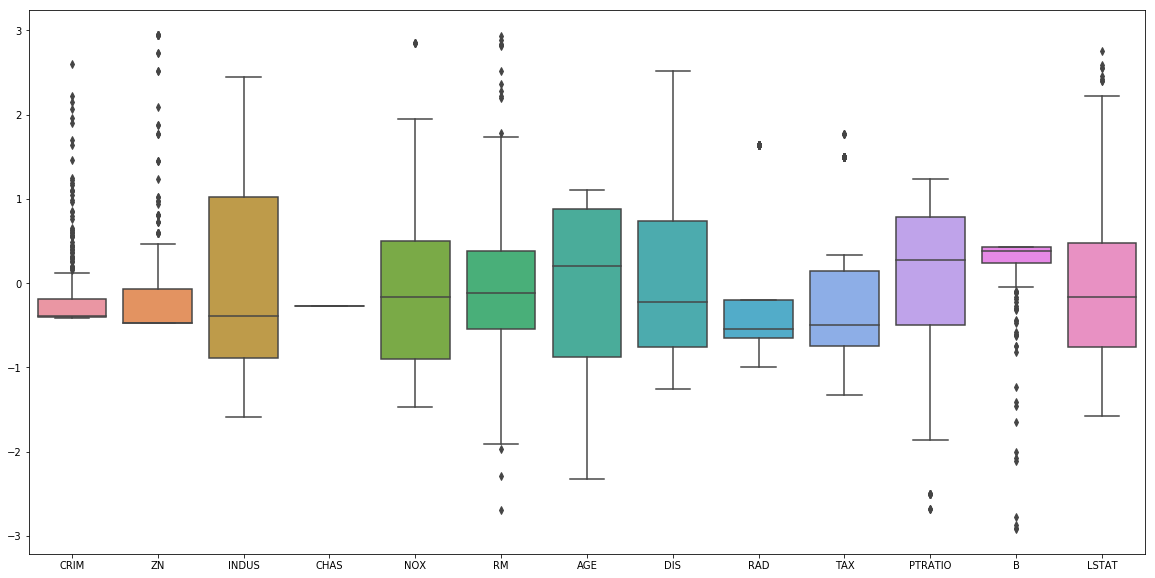

In [114]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df_o_drop[boston.feature_names])

In [115]:
x_train_drop = np.array(train_df_o_drop[boston.feature_names])
y_train_drop = np.array(train_df_o_drop.TARGET)
B_Liner_Regressor.fit(x_train_drop, y_train_drop)
B_Liner_Regressor.coef_

array([-1.42127319e+00,  2.75055604e-01,  2.86257306e-01,  1.99840144e-15,
       -1.68169991e+00,  3.41745556e+00, -3.47036204e-01, -2.82202299e+00,
        2.47517039e+00, -2.14724585e+00, -2.06235581e+00,  3.43015489e-01,
       -3.31496265e+00])

In [116]:
result_drop = cross_val_score(B_Liner_Regressor, x_train_drop, y_train_drop, cv=5)
result_drop, result_drop.mean()

(array([0.69360447, 0.7209837 , 0.59887993, 0.52701434, 0.73797875]),
 0.6556922381333388)

In [117]:
result_drop_1 = cross_val_score(B_Lasso_estimator, x_train_drop, y_train_drop, cv=5)
result_drop_1, result_dbrop_1.mean()

(array([0.61860333, 0.76920388, 0.65156172, 0.49385153, 0.62052365]),
 0.6307488227164909)

## Drop outlier: Z-score  < 1.5 

In [119]:
train_df_o_drop_2 = train_df_o[((train_df_o[boston.feature_names] < 1.5) & (train_df_o[boston.feature_names] > -1.5)).all(axis=1)].dropna(axis=0)
train_df_o_drop_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
1,-0.385113,0.382058,-0.629152,-0.271393,-0.800526,-0.584090,-0.944067,0.273724,-0.770104,-1.124446,0.052740,0.333729,0.034806,21.1
2,-0.400944,-0.472975,-0.392471,-0.271393,-0.297896,0.652392,0.390894,-0.499387,-0.540647,-0.170142,1.099964,0.401820,-0.477739,27.5
3,-0.409336,-0.472975,-1.294817,-0.271393,-0.585113,-0.175241,-0.234207,-0.583619,-0.770104,-1.302267,-0.311512,0.425669,-0.473444,36.2
7,-0.413954,-0.472975,-1.379135,-0.271393,-0.315847,0.386925,-0.322498,1.134250,-0.999561,0.055098,-1.176611,0.348328,-0.587979,16.5
8,-0.334090,-0.472975,-0.454600,-0.271393,-0.136336,-0.393862,0.454464,0.193613,-0.655375,-0.626548,1.145496,0.312554,0.273899,17.5


In [121]:
train_df_o_drop_2.shape

(126, 14)

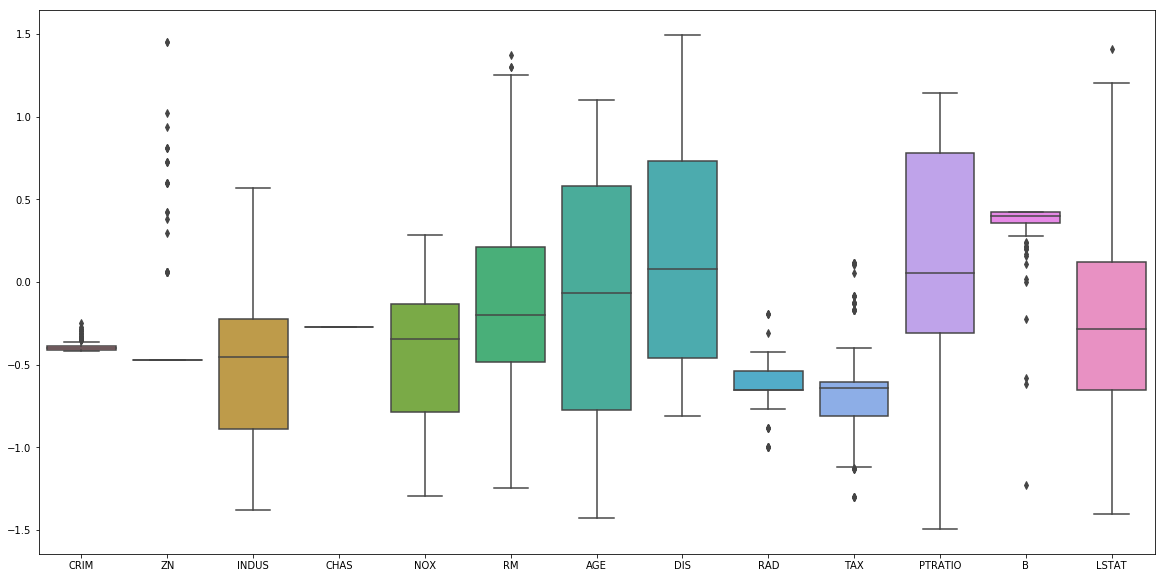

In [120]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df_o_drop_2[boston.feature_names])

In [122]:
x_train_drop_2 = np.array(train_df_o_drop_2[boston.feature_names])
y_train_drop_2 = np.array(train_df_o_drop_2.TARGET)
B_Liner_Regressor.fit(x_train_drop_2, y_train_drop_2)
B_Liner_Regressor.coef_

array([-1.92258891e+00, -7.58356295e-01, -1.26726871e+00, -7.77156117e-16,
       -1.52766616e+00,  5.23876573e+00, -2.29015154e+00, -3.50471152e+00,
        4.76835977e+00, -4.13547158e+00, -1.62196317e+00,  2.14665447e+00,
        7.00932009e-01])

In [123]:
result_drop_2 = cross_val_score(B_Liner_Regressor, x_train_drop_2, y_train_drop_2, cv=5)
result_drop_2.mean(), result_drop_2

(0.6816721708055342,
 array([0.6930791 , 0.69543786, 0.65969554, 0.59401531, 0.76613304]))

# Try to correct outlier value with IQR

In [125]:
#back to training data with Z-score feature scaling
train_df_o.shape

(379, 14)

In [126]:
train_df_o.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,379.000000
mean,-2.577827e-17,-4.686957e-18,6.796088e-17,4.686957e-17,7.405393e-16,-1.438896e-15,2.109131e-16,2.905914e-16,-3.749566e-17,7.967828e-17,9.045828e-16,-5.132218e-16,-2.202870e-16,22.440106
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,9.287844
min,-4.159172e-01,-4.729754e-01,-1.590669e+00,-2.713934e-01,-1.473692e+00,-3.842098e+00,-2.328471e+00,-1.271094e+00,-9.995605e-01,-1.337831e+00,-2.679150e+00,-3.968528e+00,-1.578709e+00,5.000000
25%,-4.071473e-01,-4.729754e-01,-8.813653e-01,-2.713934e-01,-8.992572e-01,-5.415012e-01,-8.239912e-01,-8.128084e-01,-6.553751e-01,-7.628773e-01,-6.757643e-01,1.999969e-01,-7.812575e-01,17.050000
50%,-3.867158e-01,-4.729754e-01,-2.253153e-01,-2.713934e-01,-1.363359e-01,-1.170374e-01,3.131981e-01,-2.723047e-01,-5.406466e-01,-4.902190e-01,2.803971e-01,3.649326e-01,-1.455867e-01,21.000000
75%,-2.358787e-02,6.142026e-02,1.018739e+00,-2.713934e-01,6.355609e-01,4.493875e-01,8.959193e-01,6.755901e-01,1.639194e+00,1.501373e+00,7.812436e-01,4.188710e-01,6.074827e-01,24.800000
max,8.943014e+00,3.802190e+00,2.444742e+00,3.684688e+00,2.852521e+00,3.488776e+00,1.100755e+00,3.877784e+00,1.639194e+00,1.768104e+00,1.600810e+00,4.256690e-01,3.468001e+00,50.000000


In [127]:
train_df_o_iqr = train_df_o.copy()

In [128]:
# outlier correction by BOX IQR
for col in boston.feature_names:
    q1 = np.percentile(train_df_o_iqr[col], q=25)
    q3 = np.percentile(train_df_o_iqr[col], q=75)
    iqr = q3 - q1
    Limit1 = q1 - 1.5* iqr
    Limit2 = q3 + 1.5* iqr
    train_df_o_iqr[train_df_o_iqr[col] < Limit1][col] = Limit1
    train_df_o_iqr[train_df_o_iqr[col] > Limit2][col] = Limit2
    
    

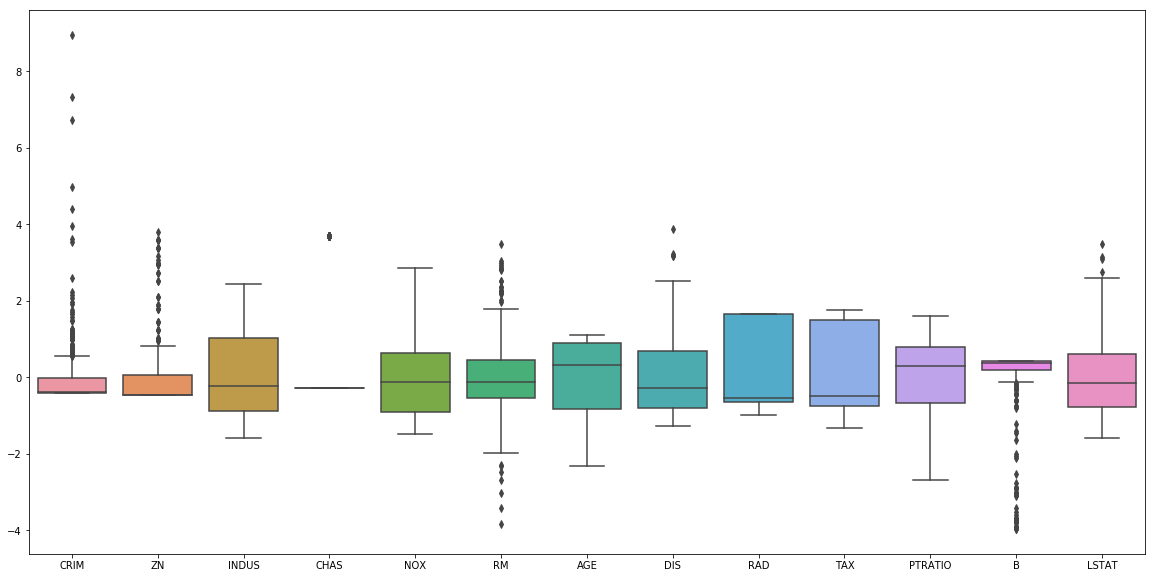

In [131]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df_o_iqr[boston.feature_names]);

In [138]:
#check shape
print(train_df_o_iqr.shape)
x_train_ss_iqr = np.array(train_df_o_iqr[boston.feature_names])
#y_train_ss_iqr = np.array(train_df_o_iqr.TARGET)

(379, 14)


In [139]:
result_ss_iqr = cross_val_score(B_Liner_Regressor, x_train_ss_iqr, y_train, cv=5)
result_ss_iqr.mean(), result_ss_iqr

(0.7010177375270557,
 array([0.68198685, 0.80262424, 0.61925492, 0.71755991, 0.68366276]))

In [149]:
B_Liner_Regressor.fit(x_train_ss_iqr, y_train)
tmp = B_Liner_Regressor.coef_
tmp

array([-1.09219583,  1.22151443,  0.27272203,  0.63407606, -2.02297552,
        2.71007685,  0.12766381, -3.19182346,  2.92342085, -2.33309041,
       -2.02793993,  0.70787978, -3.91431852])

In [150]:
for col, coef in zip(boston.feature_names, tmp):
    print(col, coef)

CRIM -1.0921958330012087
ZN 1.2215144317076971
INDUS 0.27272202955686203
CHAS 0.6340760585162408
NOX -2.0229755155610163
RM 2.710076847050995
AGE 0.1276638057288701
DIS -3.191823460489351
RAD 2.923420850747373
TAX -2.333090413029194
PTRATIO -2.0279399288169926
B 0.707879777285083
LSTAT -3.914318521673209


In [143]:
B_Lasso_estimator.fit(x_train_ss_iqr, y_train)
tmp = B_Lasso_estimator.coef_
tmp

array([-0.        ,  0.        , -0.        ,  0.00530421, -0.        ,
        2.71541309, -0.        , -0.        , -0.        , -0.        ,
       -1.41539814,  0.        , -3.6378445 ])

In [144]:
for col, coef in zip(boston.feature_names, tmp):
    print(col, coef)

CRIM -0.0
ZN 0.0
INDUS -0.0
CHAS 0.005304213772580268
NOX -0.0
RM 2.715413086884647
AGE -0.0
DIS -0.0
RAD -0.0
TAX -0.0
PTRATIO -1.4153981423699902
B 0.0
LSTAT -3.637844497880514


## Keep key feature

In [164]:
x_train_ss_iqr_key = np.array(train_df_o_iqr[['RM', 'RAD', 'LSTAT', 'PTRATIO', 'CRIM', 'TAX', 'DIS', 'NOX', 'ZN', 'B']])


In [165]:
result_ss_iqr_key = cross_val_score(B_Liner_Regressor, x_train_ss_iqr_key, y_train, cv=5)
result_ss_iqr_key.mean(), result_ss_iqr_key

(0.6998003304915225,
 array([0.68495145, 0.80439024, 0.6207205 , 0.7074564 , 0.68148305]))

# Breast_Cancer

In [167]:
Breast_cancer = datasets.load_breast_cancer()

In [168]:
Breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [169]:
breast_cancer_df = pd.DataFrame(Breast_cancer.data, columns=Breast_cancer.feature_names)
breast_target_df = pd.DataFrame(Breast_cancer.target, columns=['TARGET'])
breast_cancer_df = pd.concat([breast_cancer_df, breast_target_df], axis=1)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [170]:
breast_cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [172]:
print(breast_cancer_df.isna().all(axis=1).all())

False


In [176]:
breast_cancer_corr = breast_cancer_df.corr()['TARGET'].sort_values()
breast_cancer_corr

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

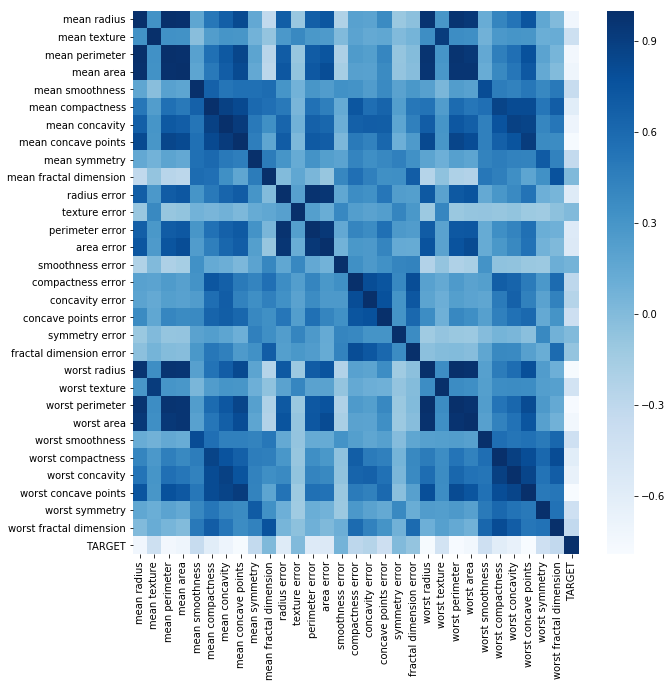

In [181]:
plt.figure(figsize=(10, 10))
sns.heatmap(breast_cancer_df.corr(), cmap=plt.cm.Blues);

In [183]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(breast_cancer_df[Breast_cancer.feature_names], 
                                                              breast_cancer_df['TARGET'])

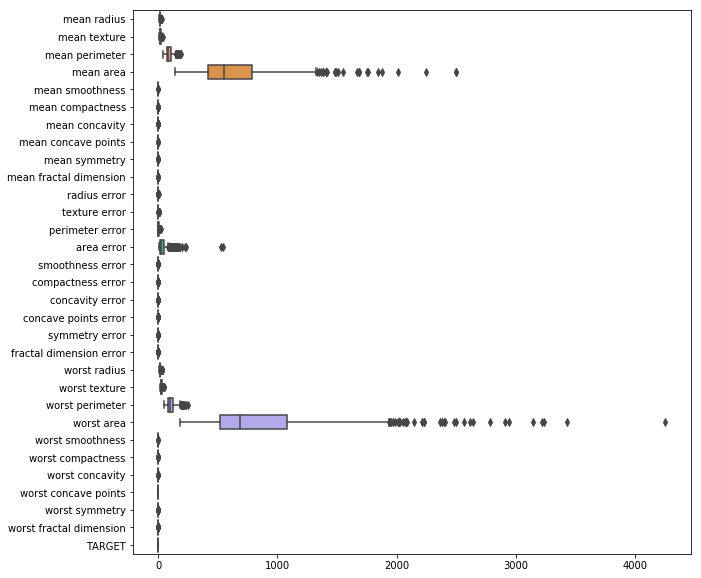

In [199]:
# check target
plt.figure(figsize=(10, 10))
sns.boxplot(data=breast_cancer_df, orient='h');

In [192]:
breast_cancer_df.TARGET.value_counts()

1    357
0    212
Name: TARGET, dtype: int64

## feature scaling >> Z-score

In [185]:
ss_scaler.fit(x_train_c)
x_train_c_ss = ss_scaler.transform(x_train_c)
x_test_c_ss = ss_scaler.transform(x_test_c)

In [200]:
LR_estimator = linear_model.LogisticRegression()
result_c_ss = cross_val_score(LR_estimator, x_train_c_ss, y_train_c, cv=5)
result_c_ss.mean(), result_c_ss

(0.9766334440753045,
 array([0.97674419, 0.93023256, 1.        , 0.97619048, 1.        ]))

In [204]:
LR_estimator.fit(x_train_c_ss, y_train_c)
bc_preict = LR_estimator.predict(x_test_c_ss)
print('breast_cancer:', np.mean(bc_preict==y_test_c))

breast_cancer: 0.9790209790209791


In [222]:
#confusion matix
bc_confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test_c, bc_preict))
bc_confusion_matrix

,0,1
0,46,3
1,0,94


In [205]:
#AUC
bc_AUC = metrics.roc_auc_score(y_test_c, bc_preict)
print(bc_AUC)

0.9693877551020409


Text(0, 0.5, 'TPR')

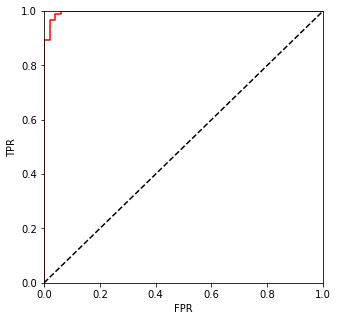

In [221]:
#ROC curve
bc_probability = LR_estimator.predict_proba(x_test_c_ss)
plt.figure(figsize=(5, 5))
fpr, tpr, _ = metrics.roc_curve(y_test_c, bc_probability[:, 1])
plt.plot(fpr, tpr, 'r')
plt.plot([0, 1], [0, 1], '--k')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('FPR')
plt.ylabel('TPR')